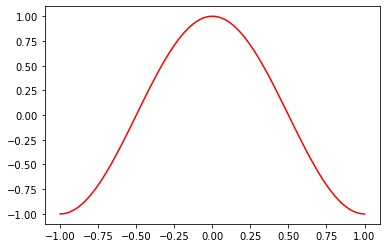

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1, 101)
m = 1, 3, 5, ....

phi_m = np.cos(m * x *np.pi/2.)
plt.plot(x,phi_m,'-r')






m = 1, n = 1, A_mn = 1.64e-01
m = 1, n = 3, A_mn = 1.10e-02
m = 1, n = 5, A_mn = -2.53e-03
m = 3, n = 1, A_mn = 1.10e-02
m = 3, n = 3, A_mn = 2.03e-03
m = 3, n = 5, A_mn = -6.44e-04
m = 5, n = 1, A_mn = -2.53e-03
m = 5, n = 3, A_mn = -6.44e-04
m = 5, n = 5, A_mn = 2.63e-04
okay


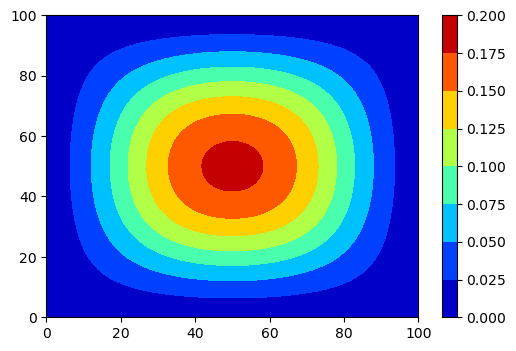

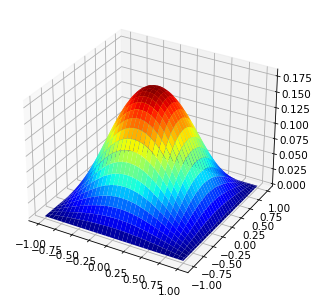

In [8]:
#Amn * cos(m/2 * pi *x) * cos(n/2*pi *y)
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace(-1,1, 101)
y = np.linspace(-1,1, 101)
PI = np.pi
X, Y = np.meshgrid(x,y)


def Find_Amn(m,n):
    temp = (m * PI/2.)**2. + (n * PI/2.)**2. 
    A_mn = 1./temp * 16./(m*n*PI**2.) * np.sin( m/4. * PI  ) * np.sin(n/4.*PI)
    u_mn = A_mn * np.cos(PI/2.* m * X) * np.cos(PI/2.* n * Y)
    return [A_mn, u_mn]

U = 0
#===
m,n = 1,1
A_mn, u_mn = Find_Amn(m,n)
print ("m = {}, n = {}, A_mn = {:3.2e}".format(m,n, A_mn))
U += u_mn
#==
m,n = 1,3
A_mn, u_mn = Find_Amn(m,n)
print ("m = {}, n = {}, A_mn = {:3.2e}".format(m,n, A_mn))
U += u_mn
#===
m,n = 1,5
A_mn, u_mn = Find_Amn(m,n)
print ("m = {}, n = {}, A_mn = {:3.2e}".format(m,n, A_mn))
U += u_mn
#==
m,n = 3,1
A_mn, u_mn = Find_Amn(m,n)
print ("m = {}, n = {}, A_mn = {:3.2e}".format(m,n, A_mn))
U += u_mn
#===
m,n = 3,3
A_mn, u_mn = Find_Amn(m,n)
print ("m = {}, n = {}, A_mn = {:3.2e}".format(m,n, A_mn))
U += u_mn
#===
m,n = 3,5
A_mn, u_mn = Find_Amn(m,n)
print ("m = {}, n = {}, A_mn = {:3.2e}".format(m,n, A_mn))
U += u_mn
#==
m,n = 5,1
A_mn, u_mn = Find_Amn(m,n)
print ("m = {}, n = {}, A_mn = {:3.2e}".format(m,n, A_mn))
U += u_mn
#===
m,n = 5,3
A_mn, u_mn = Find_Amn(m,n)
print ("m = {}, n = {}, A_mn = {:3.2e}".format(m,n, A_mn))
U += u_mn
#===
m,n = 5,5
A_mn, u_mn = Find_Amn(m,n)
print ("m = {}, n = {}, A_mn = {:3.2e}".format(m,n, A_mn))
U += u_mn


fig = plt.figure( dpi = 100 ) # dots per inch
fig.set_size_inches(6,4)
plt.contourf(U, cmap = 'jet')

plt.colorbar()
plt.clim(0,0.2)

print ('okay')



# For your reference 
##%matplotlib


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #
from matplotlib import cm


#===Plotting (3d)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi = 75)
fig.set_size_inches(5,5)
# Plot the surface.
surf = ax.plot_surface(X,Y, U, cmap=cm.jet)



# 

In [ ]:

#u_ij = 1./4. *(u_right + u_left + u_top + u_bottom + h**2 * f_ij)

In [44]:
L = 2 # meters
h = 0.5 # step size in meters
#print (h)
Nx = int(L/h) + 1
Ny = int(L/h) + 1 
print (Nx)
x = np.arange(Nx) * h - 1
y = np.arange(Ny) * h - 1
#print (x)
#print (y)
u_old = np.zeros([Nx,Ny])
u_new = np.zeros([Nx,Ny])
f = np.zeros([Nx,Ny])
#print (u_old)

for i in range(Nx):
    for j in range(Ny): 
        pos_x = i * h - 1
        pos_y = j * h - 1
        if (pos_x >-0.5 and pos_x < 0.5 and pos_y > -0.5 and pos_y < 0.5):
            f[i,j] = 1.0
            
#print (f)        

for iter in range (5000):
    res = 0.
    for i in range(1, Nx -1): #inside domain, except boundary 
        for j in range(1, Ny -1): #inside domain, except boundary 
            #print (i,j)
            f_ij = f[i,j]
            temp = (u_old[i+1,j] + u_old[i-1,j] + u_old[i,j+1]  + u_old[i,j-1] - 4. * u_old[i,j])/4.0
            error = abs(temp + f_ij)
            res = max(res, error)
            u_new[i,j] = 1./4. *(u_old[i+1,j] + u_old[i-1,j] + u_old[i,j+1]  + u_old[i,j-1]  + h**2 * f_ij)
    u_old[:] = u_new[:]
    if iter % 1000 == 0:
        print ("res = %.3f"%res)
    
        

5
res = 1.000
res = 0.938
res = 0.938
res = 0.938
res = 0.938


In [ ]:

#==========
#u_ij = 1./4. *(u_right + u_left + u_top + u_bottom + h**2 * f_ij)
#iteration



In [ ]:
# Jacobi's Method
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
nx = 50 # total 50 intervals
ny = 50 # total 50 intervals
L = 2. # meters
h = L/(nx)
x = np.arange(nx+1) * h - 1.
y = np.arange(ny+1) * h - 1.
X, Y = np.meshgrid(x,y)

#===
def AssignSource_f(nx,ny,h):
    f_arr = np.zeros([nx+1, ny+1])
    for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = i * h - 1. # x position
            pos_y = j * h - 1. # y position
            if ((pos_x - 0.5)*(pos_x + 0.5)<=0) and ((pos_y - 0.5)*(pos_y + 0.5)<=0):
                f_arr[i,j] = 1.
    return f_arr


#===
u_old = np.ones([nx+1, ny+1])
u_new = np.zeros([nx+1 , ny+1])
f_arr = AssignSource_f(nx,ny,h)
Iter_Max = 5000
for iter in range(Iter_Max):
    res = 0.
    for i in range(1,nx): # except boundary
        for j in range(1,ny): # except boundary 
            f_val = f_arr[i,j]    
            delta = (u_old[i+1,j] + u_old[i-1,j] + u_old[i,j+1] + u_old[i,j-1]-4.*u_old[i,j])/h**2 + f_val
            u_new[i,j] = 1./4 *(u_old[i+1,j] + u_old[i-1,j] + u_old[i,j+1] + u_old[i,j-1] + h**2. * f_val)
            res = max(res,abs(delta))            
    u_old[:] = u_new[:]
    if iter%1000 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res))      
        
        

iter = 0, res = 1.00e+00
iter = 1000, res = 9.96e-01
iter = 2000, res = 1.38e-01
iter = 3000, res = 1.92e-02
iter = 4000, res = 2.66e-03
